## Classification Project On Machine Failure - Yash Pawar

In [69]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train

In [70]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Step 2 : BAsic Data quality checks

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [72]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [73]:
df.duplicated().sum()

0

### Step 3: Separate X and Y (Machine failure) 

In [74]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [75]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [76]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [77]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

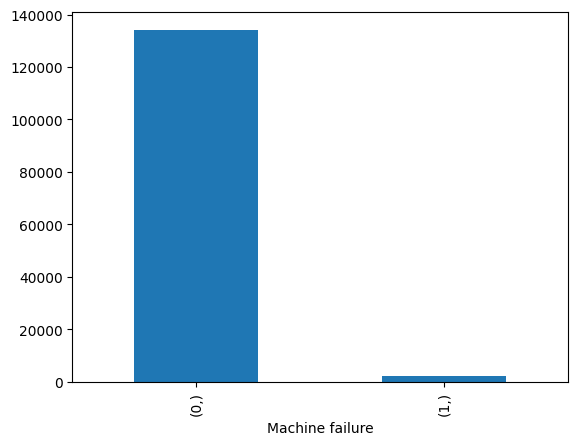

In [78]:
Y.value_counts().plot(kind='bar')

#### 0 - Means Machine NOT FAIL
#### 1 - Means Machine FAIL

### Step 4: Preprocessing pipeline for X

In [79]:
# Seperate cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [80]:
cat

['Type']

In [81]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [83]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [84]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [85]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [86]:
X_pre = pre.fit_transform(X)
X_pre.head().T

,0,1,2,3,4
num__Air temperature [K],0.395880,1.469856,-0.302204,0.610675,-1.000288
num__Process temperature [K],-0.246230,1.558605,-1.040358,0.692284,-0.679391
num__Rotational speed [rpm],0.545416,1.720308,2.051873,0.026445,0.869773
num__Torque [Nm],-0.499711,-1.323028,-1.628831,0.464745,-0.582043
num__Tool wear [min],0.556417,1.494433,-1.241447,1.447532,-1.100744
num__TWF,-0.039450,-0.039450,-0.039450,-0.039450,-0.039450
num__HDF,-0.072021,-0.072021,-0.072021,-0.072021,-0.072021
num__PWF,-0.049016,-0.049016,-0.049016,-0.049016,-0.049016
num__OSF,-0.063038,-0.063038,-0.063038,-0.063038,-0.063038
num__RNF,-0.047568,-0.047568,-0.047568,-0.047568,-0.047568


In [87]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

### Step 5: Apply train test split

In [88]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [89]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
20770,0.288483,-0.318424,0.048069,1.276300,-1.569752,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
123635,-1.322480,-0.462811,-1.501636,2.746508,0.103043,-0.03945,-0.072021,20.401325,-0.063038,-0.047568,0.0,1.0,0.0
87205,-0.785493,-1.256938,-0.377199,2.158425,-1.601020,-0.03945,-0.072021,20.401325,-0.063038,-0.047568,0.0,0.0,1.0
53579,0.986567,0.114737,-0.182585,-0.017483,-0.756805,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
29338,-0.033710,-0.390617,0.523792,-0.182146,-0.350332,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [90]:
ytrain.head()

,Machine failure
20770,0
123635,1
87205,1
53579,0
29338,0


In [91]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [92]:
xtrain.shape

(91407, 13)

In [93]:
xtest.shape

(45022, 13)

### Step 6: Algorithm Evaluation

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [95]:
dct = {'Logistic Regression': LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier()}

In [96]:
dct.items()

dict_items([('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [97]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [98]:
train = []
test = []
train_cv = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate f1 scores
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Calculate 5 fold cross validated results on train 
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in list
    train.append(f1_train)
    test.append(f1_test)
    train_cv.append(f1_cv)
    # Print above results
    print(f'Model Name : {name}\n')
    print(f'F1 Train : {f1_train:.4f}')
    print(f'F1 Test : {f1_test:.4f}')
    print(f'F1 Train CV 5 fold : {f1_cv:.4f}')
    print('\n============================================\n')

Model Name : Logistic Regression

F1 Train : 0.9317
F1 Test : 0.9282
F1 Train CV 5 fold : 0.9316


Model Name : Decision Tree

F1 Train : 0.9975
F1 Test : 0.8701
F1 Train CV 5 fold : 0.8721


Model Name : Random Forest

F1 Train : 0.9975
F1 Test : 0.9277
F1 Train CV 5 fold : 0.9280


Model Name : Gradient Boost

F1 Train : 0.9394
F1 Test : 0.9292
F1 Train CV 5 fold : 0.9297




#### Note : As the DataSet is quite Large So we skip the KNN and SVM.

### Save above results in dataframe

In [99]:
res = {'name' : list(dct.keys()),
       'train_f1' : train,
       'test_f1' : test,
       'train_cv' : train_cv}

In [100]:

df_res = pd.DataFrame(res)
df_res

,name,train_f1,test_f1,train_cv
0,Logistic Regression,0.931659,0.928174,0.931628
1,Decision Tree,0.997542,0.870149,0.872141
2,Random Forest,0.997549,0.927696,0.927961
3,Gradient Boost,0.939364,0.929212,0.929693


In [101]:
df_res.sort_values(by='train_cv',ascending=False)

,name,train_f1,test_f1,train_cv
0,Logistic Regression,0.931659,0.928174,0.931628
3,Gradient Boost,0.939364,0.929212,0.929693
2,Random Forest,0.997549,0.927696,0.927961
1,Decision Tree,0.997542,0.870149,0.872141


#### Note: Here, We Selected the Logistic Model as Final Model as it has the Highest CV (Macro) Score of 0.9316

### Step 7: Build and Evaluate the Selectes Model (Best)

In [102]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

LogisticRegression()

In [103]:
best_model.score(xtrain, ytrain)

0.9962037918321354

In [104]:
best_model.score(xtest, ytest)

0.9961352227799742

### Plot the Confusion Matrix

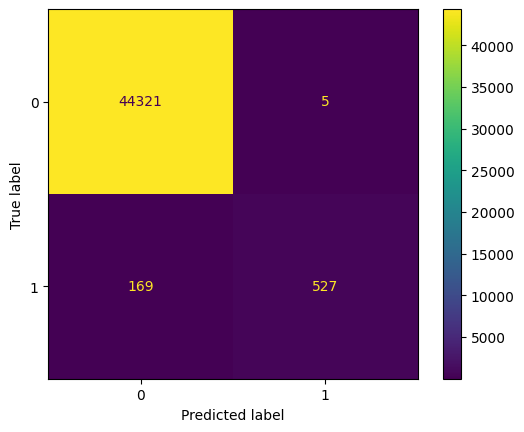

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

### Print the Classification Report

In [106]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [107]:
ypred_train[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [108]:
ytrain.head()


,Machine failure
20770,0
123635,1
87205,1
53579,0
29338,0


In [109]:
ypred_test[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [110]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [111]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44326
           1       0.99      0.76      0.86       696

    accuracy                           1.00     45022
   macro avg       0.99      0.88      0.93     45022
weighted avg       1.00      1.00      1.00     45022



### Plot the ROC AUC Curve for train and test

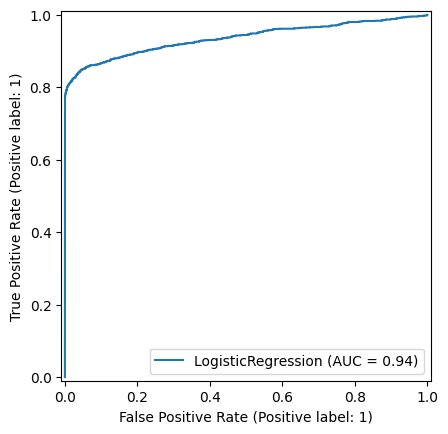

In [112]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

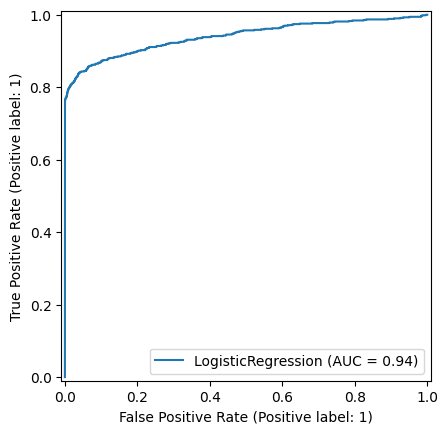

In [113]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [114]:
scores_roc = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring='roc_auc')
scores_roc

array([0.93213015, 0.94518422, 0.94168368, 0.9250702 , 0.93001242])

In [115]:
scores_roc.mean()

0.9348161336267138

### As the ROC & AUC Cross Validated Score is above 80% i.e. 0.9348 So we can conclude that the Model is GOOD

### Step 8: Get Out of Sample predictions

In [116]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [117]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [118]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Predict the results with Probability

In [119]:
preds = best_model.predict(xnew_pre)
probs = best_model.predict_proba(xnew_pre)

In [120]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [121]:
best_model.classes_

array([0, 1], dtype=int64)

In [122]:
probs[0:5]

array([[0.99788477, 0.00211523],
       [0.99887804, 0.00112196],
       [0.99739261, 0.00260739],
       [0.99710996, 0.00289004],
       [0.99653992, 0.00346008]])

In [123]:
probs_fail = probs[: ,1]
probs_fail[0:5]

array([0.00211523, 0.00112196, 0.00260739, 0.00289004, 0.00346008])

### Save above resukts in Dataframe and CSV

In [124]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [125]:
df_final['Machine_failure_pred'] = preds
df_final['Probability'] = probs_fail

In [126]:
df_final

,id,Machine_failure_pred,Probability
0,136429,0,0.002115
1,136430,0,0.001122
2,136431,0,0.002607
3,136432,0,0.002890
4,136433,0,0.003460
...,...,...,...
90949,227378,0,0.002213
90950,227379,0,0.000551
90951,227380,0,0.003185
90952,227381,0,0.002433


In [127]:
df_final['Machine_failure_pred'].value_counts()

Machine_failure_pred
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='Machine_failure_pred'>

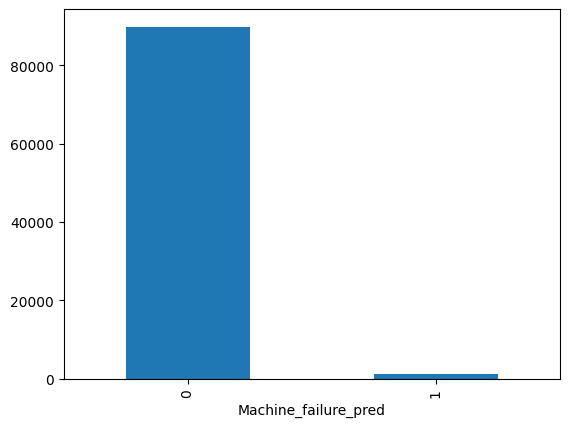

In [128]:
df_final['Machine_failure_pred'].value_counts().plot(kind='bar')

In [129]:
df_final.to_csv('Results.csv', index=False)